## Team Member Names: Madeline Witters {-}

## Project Title: Predicting Customer Churn and Identifying Attributes of At-Risk Customers {-}

**Exploratory Data Analysis**

In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [35]:
data = pd.read_csv("Bank Customer Churn Prediction.csv")
data = data.drop("customer_id", axis=1)
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
data.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [37]:
#EDA to do list: 
# drop customer_id column DONE
# check for missing data DONE
# create boxplots for categorical variables DONE
# create density plots/histograms for quantitative vars DONE
#One Hot encoding: gender, country, Balance DONE

#info on why it's best to not do too much one-hot encoding for trees: 
#https://towardsdatascience.com/one-hot-encoding-is-making-your-tree-based-ensembles-worse-heres-why-d64b282b5769

#11/17 TO DO LIST: 

#outlier removal (do before standardization): 
#https://medium.com/geekculture/essential-guide-to-handle-outliers-for-your-logistic-regression-model-63c97690a84d

#check for multicollinearity: corr plot? REVISE: create ONLY for numeric vars; remove categorical vars (remove gender, country, active, cc)

#create mosaic plots for categorical vars

#create additional boxplots for numerical vars ?

#split into train/test DONE

#standardize data DONE

#Lasso variable selection DONE (conduct research on what vars to include: perhaps simply include all for now ?)

#Create Logistic regression model

#Create RF model
#   -identify most important vars in RF

In [38]:
null_check = data.isnull().any() #no missing data in the dataframe
null_check

credit_score        False
country             False
gender              False
age                 False
tenure              False
balance             False
products_number     False
credit_card         False
active_member       False
estimated_salary    False
churn               False
dtype: bool

In [39]:
#data.min()

In [40]:
#data.max()

<AxesSubplot:xlabel='churn', ylabel='estimated_salary'>

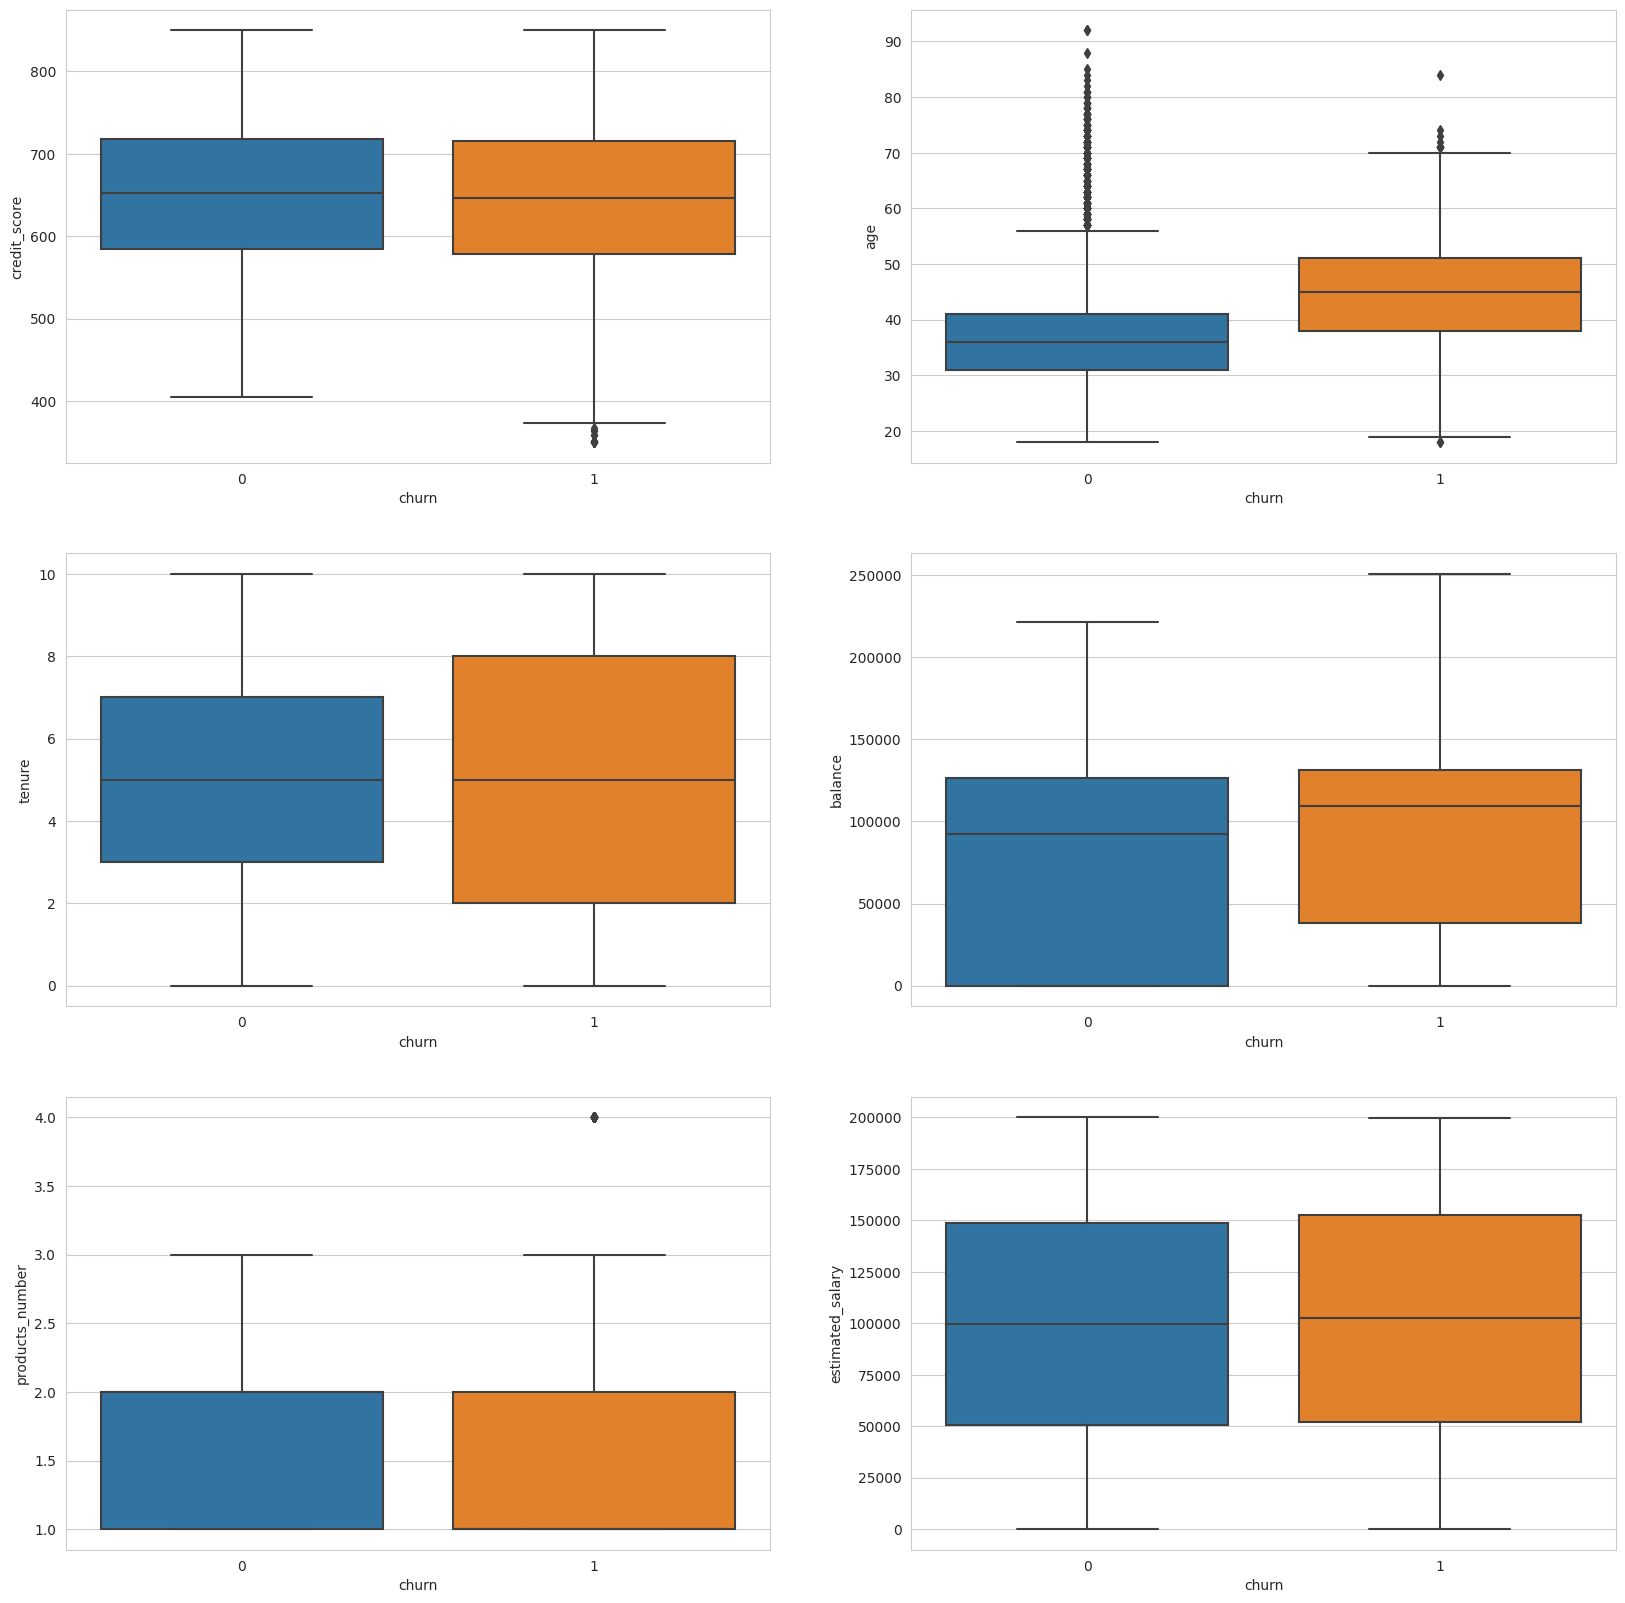

In [84]:
plt.figure(figsize=(20,20))
#plt.title("Boxplots of Numeric Dependent Variables") try to add in tile later ?

plt.subplot(3,2,1)
sns.boxplot(x='churn', y='credit_score', data=data)

plt.subplot(3,2,2)
sns.boxplot(x='churn', y='age', data=data)

plt.subplot(3,2,3)
sns.boxplot(x='churn', y='tenure', data=data)

plt.subplot(3,2,4)
sns.boxplot(x='churn', y='balance', data=data)

plt.subplot(3,2,5)
sns.boxplot(x='churn', y='products_number', data=data)

plt.subplot(3,2,6)
sns.boxplot(x='churn', y='estimated_salary', data=data)

<AxesSubplot:xlabel='balance', ylabel='Count'>

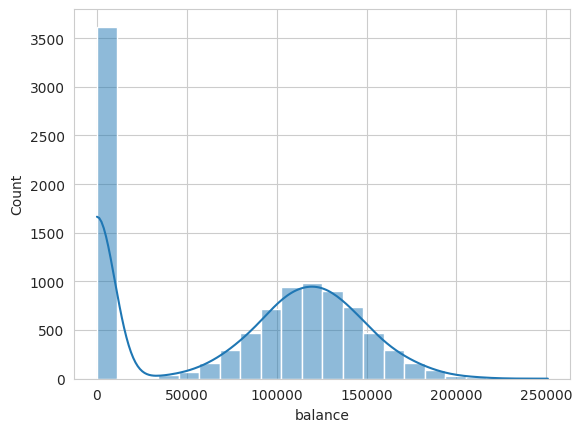

In [83]:
sns.histplot(data=data, x="balance", kde=True)

In [47]:
data['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

In [48]:
g_one_hot = pd.get_dummies(data['gender'])
g_one_hot.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [49]:
data = data.drop('gender',axis = 1)
# Join the encoded df
data = data.join(g_one_hot)
data.head()

,credit_score,country,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Female,Male
0,619,France,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,France,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,1,0


In [50]:
c_one_hot = pd.get_dummies(data['country'])
c_one_hot.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [51]:
data2 = data.drop('country',axis = 1)
data2 = data2.join(c_one_hot)
data2.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [52]:
#data2['zero_balance'] = np.where(data2['balance'] == 0.0, 1, 0) #leave this for later on! 

In [53]:
#data2.head()

In [54]:
#data2 = data2.drop('balance',axis = 1)

In [55]:
first_column = data2.pop('churn')
data2.insert(0, 'churn', first_column)

In [57]:
data2.head()

,churn,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,Female,Male,France,Germany,Spain
0,1,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,0,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1
2,1,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,0,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0
4,0,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1


In [58]:
data2.dtypes

churn                 int64
credit_score          int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
Female                uint8
Male                  uint8
France                uint8
Germany               uint8
Spain                 uint8
dtype: object

In [59]:
numeric_vars = data2[['churn', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']]

In [60]:
corr_matrix = numeric_vars.corr().round(2)
print(corr_matrix)

                  churn  credit_score   age  tenure  balance  products_number  \
churn              1.00         -0.03  0.29   -0.01     0.12            -0.05   
credit_score      -0.03          1.00 -0.00    0.00     0.01             0.01   
age                0.29         -0.00  1.00   -0.01     0.03            -0.03   
tenure            -0.01          0.00 -0.01    1.00    -0.01             0.01   
balance            0.12          0.01  0.03   -0.01     1.00            -0.30   
products_number   -0.05          0.01 -0.03    0.01    -0.30             1.00   
estimated_salary   0.01         -0.00 -0.01    0.01     0.01             0.01   

                  estimated_salary  
churn                         0.01  
credit_score                 -0.00  
age                          -0.01  
tenure                        0.01  
balance                       0.01  
products_number               0.01  
estimated_salary              1.00  


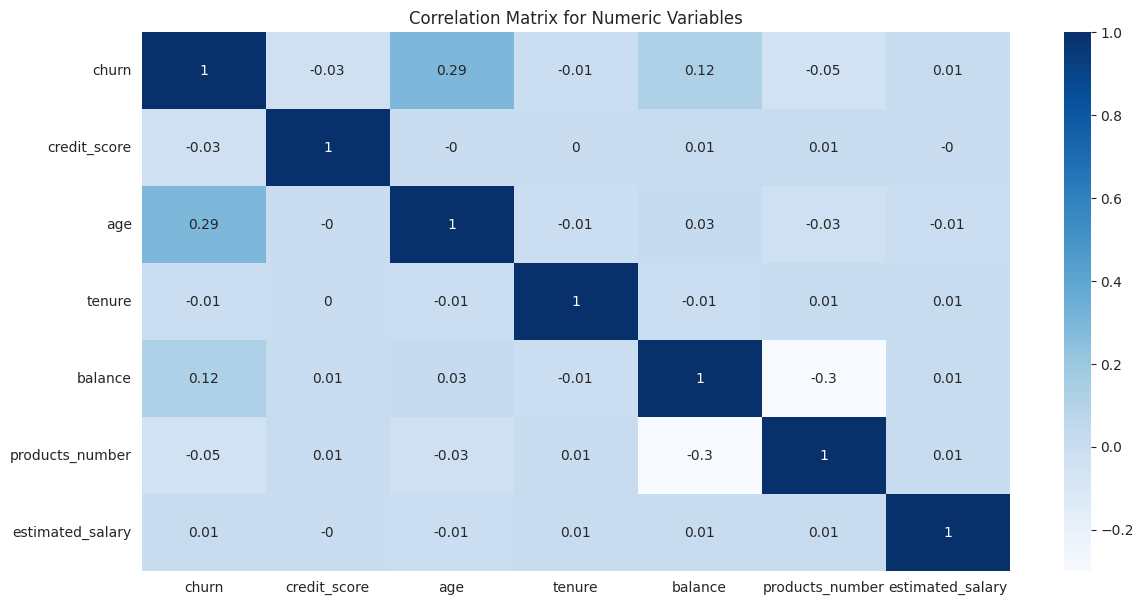

In [62]:
plt.figure(figsize = (14,7))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title(label="Correlation Matrix for Numeric Variables")
plt.show()

**Variable Selection**

In [70]:
data2.head()

,churn,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,Female,Male,France,Germany,Spain
0,1,619,42,2,0.00,1,1,1,101348.88,1,0,1,0,0
1,0,608,41,1,83807.86,1,0,1,112542.58,1,0,0,0,1
2,1,502,42,8,159660.80,3,1,0,113931.57,1,0,1,0,0
3,0,699,39,1,0.00,2,0,0,93826.63,1,0,1,0,0
4,0,850,43,2,125510.82,1,1,1,79084.10,1,0,0,0,1


In [63]:
train, test = train_test_split(data2, test_size=0.2, random_state=4)

In [64]:
train['churn'].value_counts()

0    6359
1    1641
Name: churn, dtype: int64

In [65]:
test['churn'].value_counts()

0    1604
1     396
Name: churn, dtype: int64

In [66]:
scaler = StandardScaler() #note: need to fix/finish scaling and then re-run Lasso
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [67]:
print(scaled_train[:,:1])

[[-0.50799552]
 [-0.50799552]
 [ 1.96852132]
 ...
 [-0.50799552]
 [-0.50799552]
 [-0.50799552]]


In [68]:
lasso = LassoCV(cv=10).fit(scaled_train[:,1:], np.ravel(scaled_train[:,:1]))

In [69]:
lasso.coef_

array([-1.11805112e-02,  2.85009792e-01, -1.51657664e-02,  6.06664829e-02,
       -2.21329734e-02, -1.11179505e-02, -1.74639799e-01,  1.03629219e-02,
        8.85111685e-02, -6.66133815e-18, -2.58859717e-03,  1.20782310e-01,
        0.00000000e+00])

In [71]:
#coeffs identified as important via Lasso: all except Spain? but all very small.
#note different result when balance is categorical

In [72]:
lasso.alpha_

0.0017375557653642288

In [73]:
#https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression